**Тема работы: Машинное обучение в задачах медицинской диагностики**

**Цель:** разработка и оптимизация моделей машинного обучения для прогнозирования заболеваний сердца, вклад в развитие клинической диагностики и раннего лечения сердечно-сосудистых заболеваний.

**Актуальность:** сердечно-сосудистые заболевания остаются главной причиной смерти во многих странах мира, включая развитые и развивающиеся. Исследования в этой области имеют потенциал внести значительный вклад в снижение смертности от этих заболеваний.

**Задачи:**

1. Провести анализ полученного набора данных, предварительную обработку данных, исследовать взаимосвязи между атрибутами.
2. Построить и обучить модели машинного обучения для прогнозирования различных типов заболеваний сердца на основе подготовленного набора данных.
3. Оценить качество и эффективность моделей с использованием различных метрик, таких как accuracy, precision, recall, F1-
score.

5. Провести сравнительный анализ качества различных моделей машинного обучения.
6. Выбрать наиболее перспективные модели и измененить при необходимости гиперпараметры.
7. Исследовать влияние размера обучающей выборки на качество лучших моделей и узнать время их обучения.
8. Провести оценку производительности лучших моделей с использованием кросс-валидации.
9. Проанализировать важность признаков.
10. Описать результаты исследования и сделать выводы.










**Датасет:** https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

**1. Обзор и предобработка данных**

Датасет о заболеваниях сердца содержит информацию, объединенную из пяти популярных наборов данных о заболеваниях сердца, которые ранее были доступны независимо. В нем содержатся 1190 экземпляров с 11 характеристиками:

1. Возраст пациента в годах (Age).
2. Пол пациента (0 = женский, 1 = мужской) (Sex).
3. Классификация типа боли в груди по категориям (Chest Pain Type).
4. Артериальное давление в состоянии покоя (Resting Blood Pressure).
4. Уровень холестерина в мг/дл (Cholesterol).
5. Уровень сахара в крови натощак (если превышает 120 мг/дл, то = 1, иначе 0) (Fasting Blood Sugar).
6. Результаты электрокардиографии в состоянии покоя, классифицированные по категориям (Resting Electrocardiographic Results).
7. Максимальная частота сердечных сокращений (Maximum Heart Rate).
8. Стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет) (Exercise Induced Angina).
9. Числовое значение, отражающее ST депрессию на ЭКГ (Oldpeak).
10. Классификация наклона ST-сегмента в состоянии покоя (ST Slope).
11. Целевая переменная, обозначающая наличие или отсутствие сердечно-сосудистого заболевания (1 = есть, 0 = отсутствует) (Target).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")
df.head(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [ ]:
y = df['target']
X = df.drop(['target'], axis=1)

In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
print("Характеристики атрибутов:")
df.info()

Характеристики атрибутов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
print("Отсутствующие значения:")
print(df.isnull().sum())

Отсутствующие значения:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Все значения числовые и ненулевые.

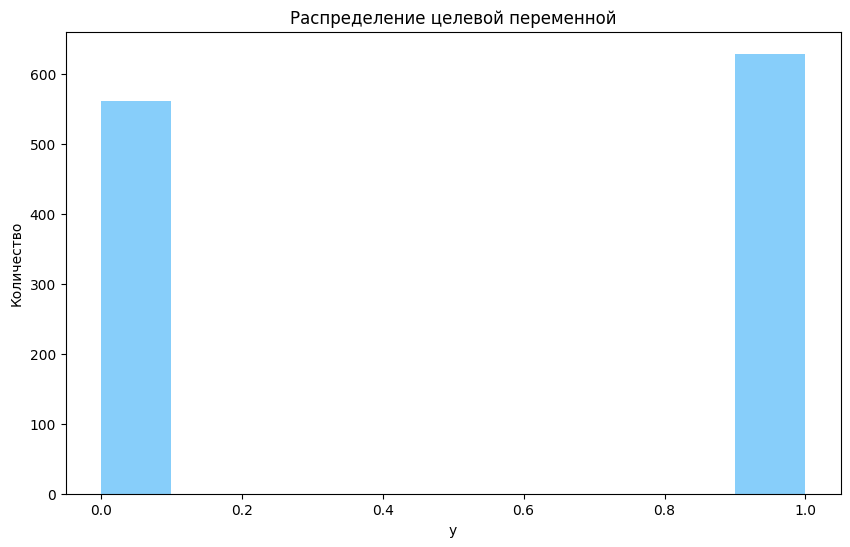

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Распределение целевой переменной')
plt.hist(y, color='lightskyblue')
plt.xlabel('y')
plt.ylabel('Количество')
plt.show()

Целевой столбец достаточно хорошо сбалансирован.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>, <Axes: >]], dtype=object)

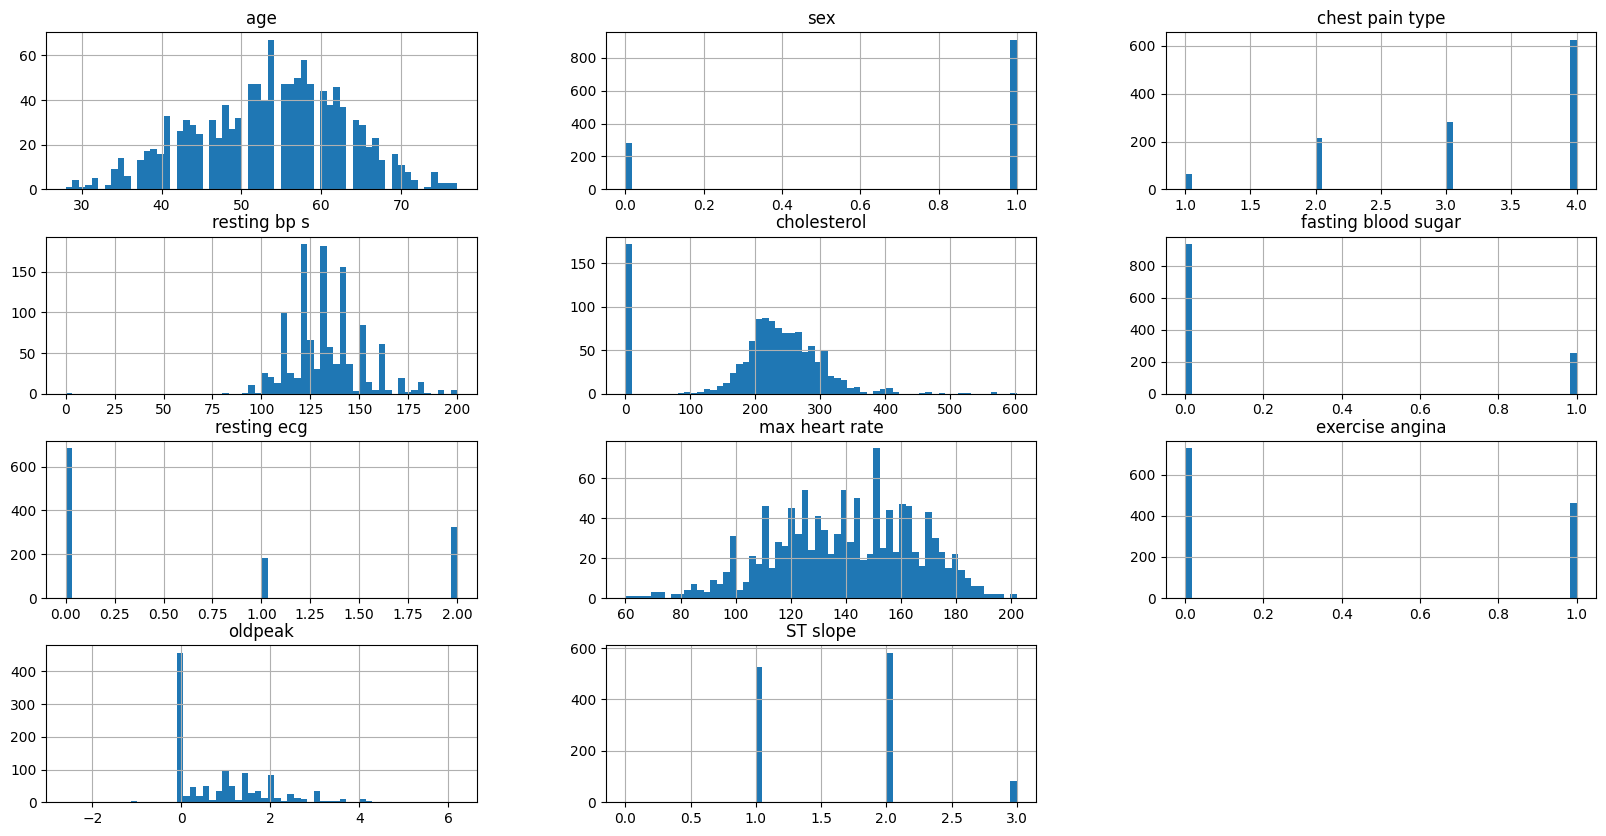

In [ ]:
X.hist(figsize=(20, 10), bins = 60)

Присутствуют некоторые аномалии в признаках cholesterol и resting bp s.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e12e4d7e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e12e4f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e0c6cee90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e12e4d210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e12e4d240>],
 'means': []}

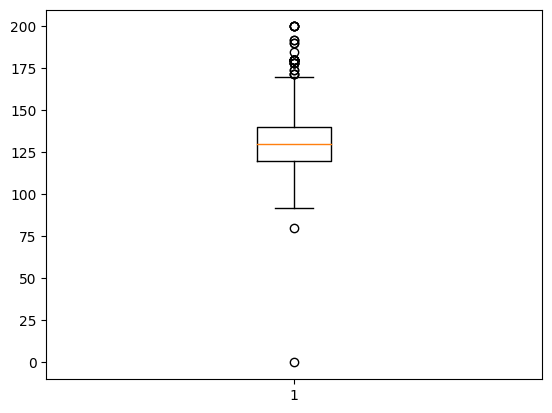

In [ ]:
plt.boxplot(df['resting bp s'])

Артериальное давление в состоянии покоя не может быть равным 0, поэтому узнаем у каких наблюдений оно такое.

In [ ]:
df[df['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [ ]:
# у этого же человека cholesterol = 0, поэтому удалим строку
df.drop(index=450, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e0d0e9ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e0d0e9ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e0d0e9240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e0d0eba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e12708310>],
 'means': []}

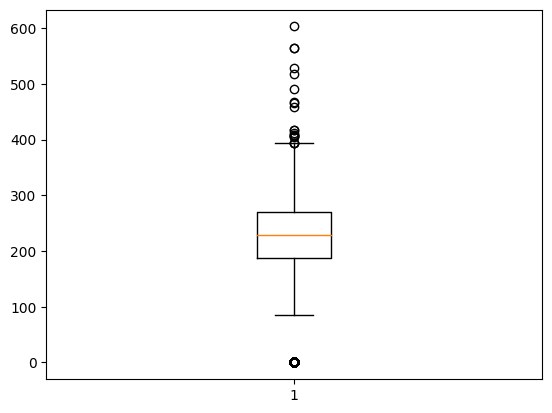

In [ ]:
plt.boxplot(df['cholesterol'])

Уровень холестерина не может быть равен нулю, однако столбец содержит большое количество нулей.

In [ ]:
# Процент строк, где уровень холестерина = 0
sum(df['cholesterol'] == 0) / len(df) * 100

14.38183347350715

In [ ]:
# У 88 % этих людей было сердечно-сосудистое заболевание
df[df['cholesterol'] == 0]['target'].value_counts(normalize=True)

target
1    0.883041
0    0.116959
Name: proportion, dtype: float64

In [ ]:
# Вычисляем среднее значение холестерина для группы данных, где холестерин не равен нулю, но человек болен
mean_cholesterol = df[(df['cholesterol'] != 0) & (df['target'] == 1)]['cholesterol'].mean()

# Заменяем нулевые значения холестерина на среднее значение
df.loc[(df['cholesterol'] == 0) & (df['target'] == 1), 'cholesterol'] = mean_cholesterol

In [ ]:
# Вычисляем среднее значение холестерина для группы данных, где холестерин не равен нулю, но человек не болен
mean_cholesterol = df[(df['cholesterol'] != 0) & (df['target'] == 0)]['cholesterol'].mean()

# Заменяем нулевые значения холестерина на среднее значение
df.loc[(df['cholesterol'] == 0) & (df['target'] == 0), 'cholesterol'] = mean_cholesterol

<Axes: xlabel='cholesterol', ylabel='Count'>

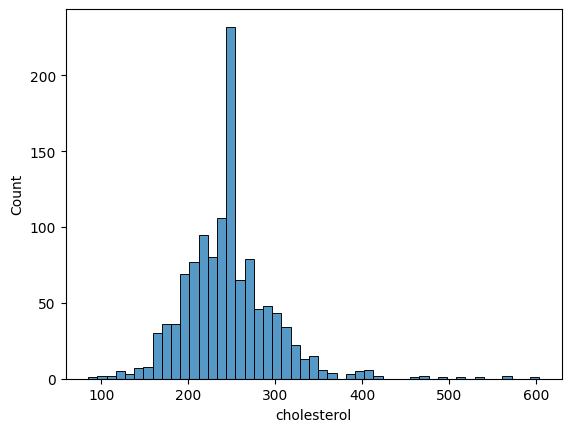

In [ ]:
sns.histplot(df.cholesterol)

Факторы в целом распределены хорошо, присутствуют некоторые аномально высокие значения, однако не будем их менять, так как они могут представлять редкие или уникальные случаи.

Значимость атрибутов для предсказания целевой переменной:


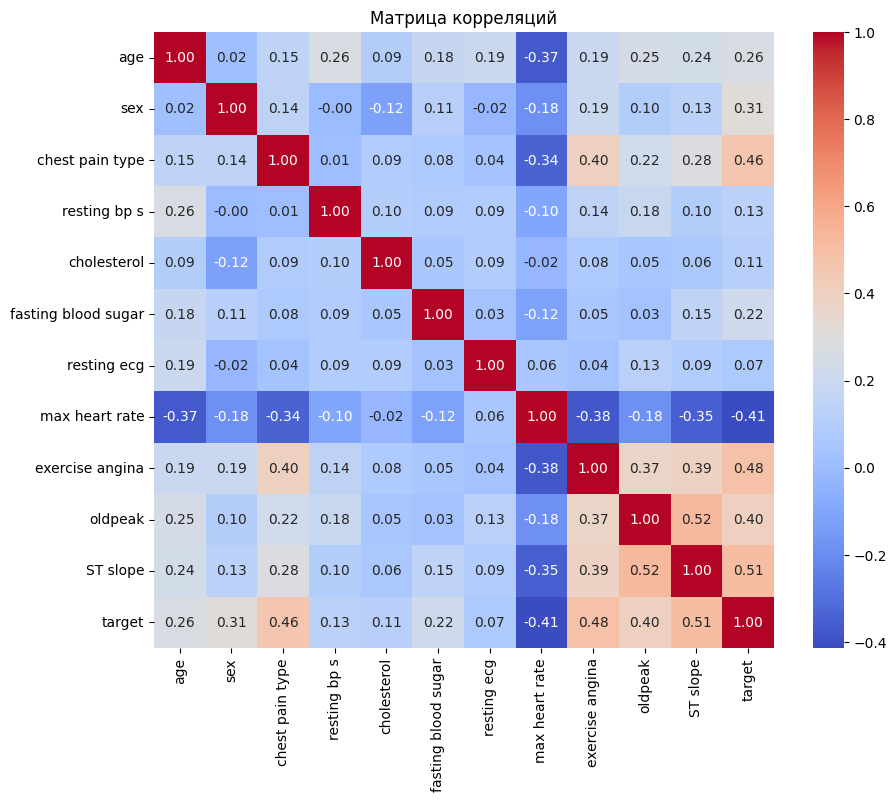

In [ ]:
print("Значимость атрибутов для предсказания целевой переменной:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Сильной корреляционной связи между факторами нет (мультиколлинеарность отсутствует). С целевой переменной умеренная положительная корреляция у признаков 'Chest Pain Type', 'Exercise Induced Angina', 'Oldpeak', 'ST Slope', а умеренная отрицательная у 'max heart rate'.



**2. Разработка моделей машинного обучения**

Временная последовательность не играет важной роли, нужно случайным образом разделить данные, поэтому используется случайный метод разделения.

In [ ]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train)

RandomForestClassifier()

Метод k-ближайших соседей (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Наивный байесовский классификатор (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

Градиентный бустинг (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

**3. Оценка качества моделей**

Для оценки качества и эффективности моделей используем  метрики accuracy, precision, recall, F1- score, так как перед нами задача классификации.

Составим таблицу, которая помогает оценить производительность каждой модели и сравнить метрики между собой.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Логистическая регрессия': model_lr,
    'Метод опорных векторов': model_svm,
    'Деревья решений': model_dt,
    'Случайный лес': model_clf,
    'Метод k-ближайших соседей': model_knn,
    'Наивный байесовский классификатор': model_nb,
    'Градиентный бустинг': model_gb,
}

metrics_data = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics = {
        'Модель': name,
        'Accuracy': round(accuracy*100, 2),
        'Precision': round(precision*100, 2),
        'Recall': round(recall*100, 2),
        'F1-Score': round(f1*100, 2)
    }

    metrics_data.append(metrics)

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Модель,Accuracy,Precision,Recall,F1-Score
0,Логистическая регрессия,84.45,84.67,87.88,86.25
1,Метод опорных векторов,74.79,77.69,76.52,77.10
2,Деревья решений,84.87,90.00,81.82,85.71
3,Случайный лес,93.70,93.33,95.45,94.38
4,Метод k-ближайших соседей,80.25,82.95,81.06,81.99
5,Наивный байесовский классификатор,84.87,87.50,84.85,86.15
6,Градиентный бустинг,94.96,95.45,95.45,95.45


**4. Интерпретация результатов**

Исходя из представленных результатов, можно сравнить эффективность различных алгоритмов машинного обучения в задаче прогнозирования заболеваний сердца:
1. Логистическая регрессия, деревья решений, наивный байесовский классификатор показали хорошие результаты с близкими значениями метрик.
2. Лучшее метрики показали модели случайный лес (Random Forest) и градиентный бустинг (Gradient Boosting).
3. Метод опорных векторов и метод k-ближайших соседей демонстрируют меньшую точность, метод опорных векторов хуже всего справился с задачей.

Основываясь на метриках Accuracy, Precision, Recall и F1-Score, можно сделать вывод, что Gradient Boosting показывает наилучшее качество, немного превосходя Random Forest.

**5. Настройка гиперпараметров для наиболее перспективных моделей**

Автоматически определяем наилучшие гиперпараметры для наиболее перспективных моделей на основе заданных значений и кросс-валидации (с использованием метода Grid Search).

In [ ]:
from sklearn.model_selection import GridSearchCV

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры для Градиентного бустинга:")
print(gb_grid_search.best_params_)

Лучшие гиперпараметры для Градиентного бустинга:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры для Случайного леса:")
print(rf_grid_search.best_params_)

Лучшие гиперпараметры для Случайного леса:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_gb_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До подбора гиперпараметров': [94.96, 95.45, 95.45, 95.45],
    'После подбора гиперпараметров': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Градиентного бустинга:')
metrics_df

Для Градиентного бустинга:


,Метрика,До подбора гиперпараметров,После подбора гиперпараметров
0,Accuracy,94.96,94.12
1,Precision,95.45,94.70
2,Recall,95.45,94.70
3,F1-score,95.45,94.70


In [ ]:
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До подбора гиперпараметров': [86.55, 90.98,	84.09,	87.40],
    'После подбора гиперпараметров': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Случайного леса:')
metrics_df

Для Случайного леса:


,Метрика,До подбора гиперпараметров,После подбора гиперпараметров
0,Accuracy,86.55,94.12
1,Precision,90.98,93.38
2,Recall,84.09,96.21
3,F1-score,87.40,94.78


Исходя из таблиц сравнения метрик для моделей Случайного леса и Градиентного бустинга до и после подбора гиперпараметров, можно сделать следующие выводы:

Для модели Случайного леса наблюдается значительное улучшение всех рассматриваемых метрик, таких как accuracy, precision, recall и F1-score, после настройки гиперпараметров.

После подбора гиперпараметров для модели градиентного бустинга мы видим незначительное ухудшение метрик по сравнению с исходными значениями. Возможно, после подбора гиперпараметров модель стала более устойчивой или эффективной на других наборах данных, что не всегда может отразиться в увеличении метрик на тестовом наборе данных.


**6. Влияние размера обучающей выборки на качество моделей**

Для Градиентного бустинга:


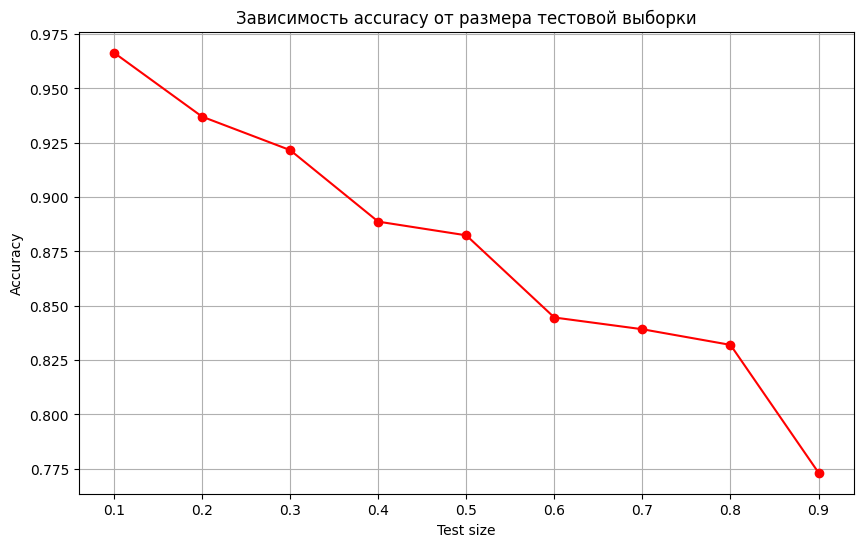

In [ ]:
def test_size_vs_accuracy(model, X, y, test_sizes=np.linspace(0.1, 0.9, 9), random_state=42):
    test_accuracies = []
    for size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(test_sizes, test_accuracies, 'o-', color="r")
    plt.xlabel("Test size")
    plt.ylabel("Accuracy")
    plt.title("Зависимость accuracy от размера тестовой выборки")
    plt.grid(True)
    plt.show()
print('Для Градиентного бустинга:')
test_size_vs_accuracy(best_gb_model, X, y)

Для Случайного леса:


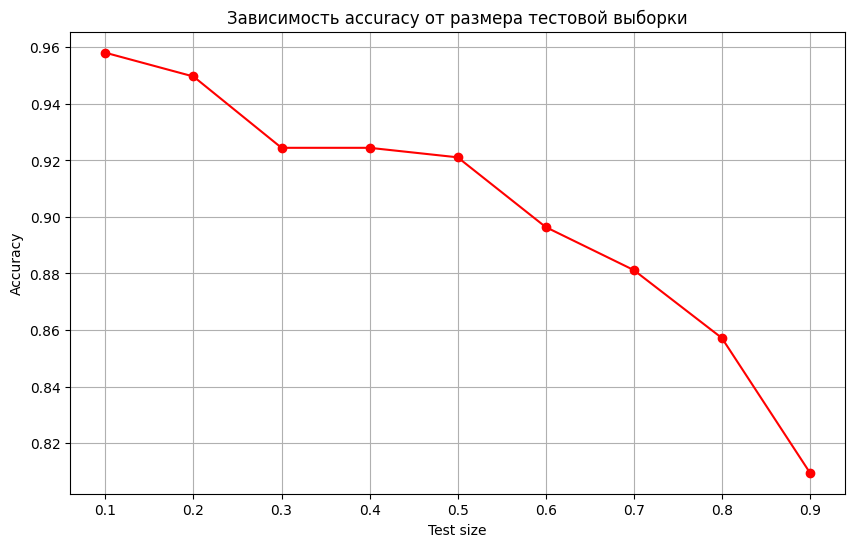

In [ ]:
print('Для Случайного леса:')
test_size_vs_accuracy(best_rf_model, X, y)

Следовательно, увеличение объема данных для тестирования модели снижает её производительность. Далее снизим размер тестовой выборки до 10% и создадим таблицы сравнения метрик до и после такого преобразования, так же засечем время обучения моделей.

In [ ]:
import time

start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
best_gb_model2 = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
best_gb_model2.fit(X_train, y_train)
end_time = time.time()
print("Время обучения модели: {:.2f} секунд".format(end_time-start_time))
y_pred = best_gb_model2.predict(X_test)

metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До ': [94.12, 94.70, 94.70, 94.70],
    'После ': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Градиентного бустинга:')
metrics_df

Время обучения модели: 2.46 секунд
Для Градиентного бустинга:


,Метрика,До,После
0,Accuracy,94.12,96.64
1,Precision,94.70,94.03
2,Recall,94.70,100.00
3,F1-score,94.70,96.92


In [ ]:
start_time = time.time()
best_rf_model2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_rf_model2.fit(X_train, y_train)
end_time = time.time()
print("Время обучения модели: {:.2f} секунд".format(end_time-start_time))
y_pred = best_rf_model2.predict(X_test)

metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До': [94.12, 93.38,	96.21,	94.78],
    'После': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Случайного леса:')
metrics_df

Время обучения модели: 0.25 секунд
Для Случайного леса:


,Метрика,До,После
0,Accuracy,94.12,95.80
1,Precision,93.38,95.31
2,Recall,96.21,96.83
3,F1-score,94.78,96.06


Вероятно, уменьшение размера тестовой выборки позволило моделям лучше узнать общие закономерности данных, что привело к увеличению точности предсказаний.

Значительное улучшение метрик, особенно для градиентного бустинга, также может свидетельствовать о том, что модели стали более стабильными и менее склонными к переобучению.

На основе измеренного времени обучения можно сделать вывод, что Случайный лес более эффективен с точки зрения времени обучения по сравнению с Градиентным бустингом. Градиентный бустинг обычно требует значительно больше времени для обучения, чем Случайный лес. Это может быть обусловлено тем, что Градиентный бустинг является последовательным алгоритмом, который обучается итеративно на каждой итерации, в то время как Случайный лес использует параллельную обработку для построения множества деревьев решений.




**7. Оценка производительности моделей с использованием кросс-валидации**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(best_gb_model2, X, y, cv = 5, scoring = 'accuracy', n_jobs=-1)
print('Gradient Boosting:')
print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Gradient Boosting:
Кросс-валидация:  [0.87394958 0.90756303 0.94117647 0.93277311 0.97046414]
Среднее по кросс-валидации:  0.9251852639790095
Дисперсия по кросс-валидации:  0.03255490401360084


In [ ]:
cv_results = cross_val_score(best_rf_model2, X, y, cv = 5, scoring = 'accuracy', n_jobs=-1)
print('Random Forest:')
print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Random Forest:
Кросс-валидация:  [0.89495798 0.89495798 0.94957983 0.94957983 0.96624473]
Среднее по кросс-валидации:  0.9310640711980994
Дисперсия по кросс-валидации:  0.030101974776001024


Среднее значение метрики кросс-валидации для Gradient Boosting составляет 92.5%, что означает, что модель в целом показывает хорошую производительность. Дисперсия метрики кросс-валидации относительно невелика (0.033), что может свидетельствовать о стабильности производительности модели на различных подвыборках данных.

Среднее значение метрики кросс-валидации для Random Forest составляет 93.1%, что показывает, что модель Random Forest также обладает хорошей производительностью на кросс-валидации. Дисперсия метрики кросс-валидации также относительно невелика (0.03).

Обе модели, Gradient Boosting и Random Forest, демонстрируют хорошую производительность на кросс-валидации, с небольшой разницей в пользу модели Random Forest.

**8. Важность признаков**

In [ ]:
print('Для Random Forest')
importances = best_rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.176694)
2. feature 2 (0.140147)
3. feature 9 (0.129186)
4. feature 7 (0.127055)
5. feature 4 (0.109049)
6. feature 0 (0.085308)
7. feature 3 (0.082223)
8. feature 8 (0.063295)
9. feature 1 (0.042166)
10. feature 6 (0.026608)
11. feature 5 (0.018270)


In [ ]:
print('Для Gradient Boosting')
importances = best_gb_model2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.336139)
2. feature 4 (0.141414)
3. feature 2 (0.132502)
4. feature 9 (0.095282)
5. feature 7 (0.081779)
6. feature 3 (0.059073)
7. feature 1 (0.050835)
8. feature 0 (0.044832)
9. feature 8 (0.022793)
10. feature 6 (0.021553)
11. feature 5 (0.013797)


Наиболее показательные параметры в моделе Random Forest: feature 10 (ST slope), feature 2 (Chest Pain Type), feature 9 (oldpeak), feature 7 (Maximum Heart Rate).

Наиболее показательные параметры в моделе Gradient Boosting: feature 10 (ST slope), feature 4 (Cholesterol), feature 2 (Chest Pain Type), feature 9 (oldpeak).

**9. Выводы**

Исследование показало, что разработка и оптимизация моделей машинного обучения для прогнозирования заболеваний сердца имеет высокий потенциал для вклада в развитие клинической диагностики и раннего лечения сердечно-сосудистых заболеваний. В ходе работы были использованы следующие алгоритмы машинного обучения: Logistic Regression, SVM, Decision Tree, Random Forest, K-Nearest Neighbors, Naive Bayes, Gradient Boosting. Для каждого алгоритма было оценено качество модели с помощью метрик accuracy, precision, recall, F1-score и проведен анализ ошибок.

Исходя из результатов анализа, можно сделать вывод о том, что для задачи прогнозирования заболеваний сердца наиболее подходящими моделями являются Gradient Boosting и Random Forest. Обе модели показывают высокую точность предсказаний и хорошую производительность на кросс-валидации.

После настройки гиперпараметров для моделей наблюдается улучшение метрик, особенно для Случайного леса. Это говорит о том, что оптимизация гиперпараметров может значительно повысить качество моделей. Уменьшение размера тестовой выборки до 10% привело к улучшению метрик для обеих моделей. Это может свидетельствовать о том, что модели лучше узнали общие закономерности данных при таком размере выборки. Однако следует отметить, что Градиентный бустинг требует значительно больше времени для обучения по сравнению со Случайным лесом. Поэтому выбор между этими моделями также может зависеть от временных ограничений и требований к скорости работы.

Таким образом, для решения задачи прогнозирования заболеваний сердца рекомендуется использовать модель Random Forest из-за её хорошей производительности и относительно невысокого времени обучения.

Важные факторы, влияющие на точность прогнозирования, включают тип боли в груди (Chest Pain Type), уровень холестерина (Cholesterol), максимальную частоту сердечных сокращений (Maximum Heart Rate), а также параметры связанные с ЭКГ, такие как ST slope и ST depression (Oldpeak). Эти факторы могут играть ключевую роль в диагностике сердечно-сосудистых заболеваний.

В целом, исследование подтверждает перспективность применения методов машинного обучения в медицинской диагностике, особенно в области прогнозирования заболеваний сердца.